## 1. Problem Statement
Patients with liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

## 2. Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score, roc_auc_score
!pip install imblearn
!pip3 install xgboost


## 3. Load Data

In [2]:
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Insights
This dataset does not have proper header names and the existing header name looks like the first record of the dataset

In [3]:
# Renaming the column names
data.columns = ['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin',
                'Alkaline_Phosphatase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 
               'Albumin_and_Globulin_Ratio', 'Target']
data.head(3)

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1


In [4]:
# Creating a new row with the previous header data
new_row = pd.DataFrame({'Age_of_the_patient':65, 'Gender_of_the_patient':'Female', 'Total_Bilirubin':0.7,
                        'Direct_Bilirubin':0.1, 'Alkaline_Phosphatase':187, 'Alamine_Aminotransferase':16,
                        'Aspartate_Aminotransferase':18,'Total_Protiens':6.8,'Albumin':3.3,
                        'Albumin_and_Globulin_Ratio':0.9, 'Target': 1},
                                                            index =[0])

In [5]:
# Concatenate "data" with "new_row" dataframe
data = pd.concat([new_row, data]).reset_index(drop = True)
data

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [6]:
# Shortening some column names for better readability
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                'Alkaline_Phosphatase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase','Total_Protiens', 'Albumin', 
               'A_G_Ratio', 'Target']
data.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [7]:
#### Creating a backup
data_backup = data.copy()

## 4. Domain Analysis
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Target" column is a class label used to divide groups into liver patients (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".
The various features of the dataset are explained below:-

- **Age of the patient**: This column refers to age of an individual who is receiving medical care or attention.
- **Gender of the patient**:  This column refers to the individual's gender identity, that is, male or female.
- **Total Bilirubin**: This refers to the total amount of bilirubin in the bloodstream. Bilirubin is a yellowish pigment that forms when red blood cells break down. It is produced in the liver and is a natural waste product of the body's normal process of recycling old or damaged red blood cells. Total bilirubin levels can be used to assess the health of the liver and the process of red blood cell breakdown. Abnormal levels of bilirubin in the blood can indicate various medical conditions, including liver disease.
- **Direct Bilirubin**: Direct bilirubin, also known as conjugated bilirubin, is a component of total bilirubin in the blood. Direct bilirubin levels are measured in blood tests and are a critical component in assessing liver health and the function of the biliary system (the system that produces and transports bile). Elevated levels of direct bilirubin can indicate a problem with the liver or bile ducts. This can be due to various liver diseases, including hepatitis, cirrhosis, or obstruction of the bile ducts, which can occur due to gallstones or other conditions.
- **Alkaline Phosphatase**: Alkaline phosphatase (ALP) is an enzyme found in various tissues throughout the body, with its highest concentrations typically found in the liver, bile ducts, bones, and placenta during pregnancy. ALP plays a vital role in several physiological processes.
- **Alamine Aminotransferase**: Alanine aminotransferase (ALT), also known as serum glutamate pyruvate transaminase (SGPT), is an enzyme found primarily in the liver. ALT plays a crucial role in the metabolism of amino acids, which are the building blocks of proteins.
- **Aspartate Aminotransferase**: Aspartate aminotransferase (AST), also known as serum glutamic oxaloacetic transaminase (SGOT), is an enzyme found in various tissues throughout the body, with higher concentrations in the heart, liver, skeletal muscles, and kidneys. AST plays a crucial role in amino acid metabolism and energy production.
- **Total Protiens**: "Total proteins"is a laboratory test that measures the total amount of proteins in the liquid (serum or plasma) portion of your blood. This test provides information about the overall concentration of proteins in your bloodstream, but it doesn't differentiate between the various types of proteins.
- **Albumin**: Albumin is a protein that is found in the blood plasma.  It is one of the most abundant proteins in the blood, accounting for approximately 60% of the total protein content in human plasma. Albumin is primarily produced by the liver and serves several important functions in the body.
- **Albumin and Globulin Ratio**: The albumin-to-globulin ratio, often abbreviated as the A/G ratio, is a simple blood test that measures the relative proportions of two major groups of proteins found in the blood: albumin and globulins. This ratio is used to assess a person's overall health and can provide important information about various medical conditions.
- **Target**: This column represents patients with liver disease or not (no disease). Here "1" represents patients with liver disease and "2" represents patients with no disease.


## 5. Basic Checks

In [8]:
# check the first 5 records
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
# check the last 5 records
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [10]:
# check the number of rows and columns
data.shape

(583, 11)

In [11]:
# check the column names
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphatase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'A_G_Ratio',
       'Target'],
      dtype='object')

In [12]:
# check the data type of all columns
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphatase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
A_G_Ratio                     float64
Target                          int64
dtype: object

In [13]:
# fetch the numerical columns
num_col=data.select_dtypes(include=["int64","float64"])
num_col.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphatase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'A_G_Ratio', 'Target'],
      dtype='object')

In [14]:
# fetch the categorical columns
cat_col=data.select_dtypes(include=["object"])
cat_col.columns

Index(['Gender'], dtype='object')

In [15]:
# find unique categories in categorical columns
cat_col.value_counts()

Gender
Male      441
Female    142
dtype: int64

In [16]:
# Check count of unique values for each column.
data.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphatase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
A_G_Ratio                      69
Target                          2
dtype: int64

In [17]:
# check the summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphatase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   A_G_Ratio                   579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [18]:
# statistical analysis of numerical columns 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphatase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
A_G_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Target,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


### Insights:
- The minimum age of patient is 4 years and maximum age is 90 years.
- Total_Bilirubin ranges between 0.4 - 75
- Direct_Bilirubin ranges between 0.1 - 19.7
- Alkaline_Phosphatase ranges between 63 - 2110
- Alamine_Aminotransferase ranges between 10 - 2000
- Aspartate_Aminotransferase ranges between 10 - 4929
- Total_Protiens ranges between 2.7 - 9.6
- Albumin ranges between 0.9 - 5.5
- A_G Ratio ranges between 0.3 - 2.8

In [19]:
# statistical analysis for categorical columns 
data.describe(include='object') 

,Gender
count,583
unique,2
top,Male
freq,441


### Insights
- The number of male patients are more than female patients.

## 6. Exploratory Data Analysis (EDA)

### A. Univariate Analysis
* Count plot is used to check distribution of categorical and discrete data
* Hist plot is used to check distribution of numerical data

<AxesSubplot:xlabel='Gender', ylabel='count'>

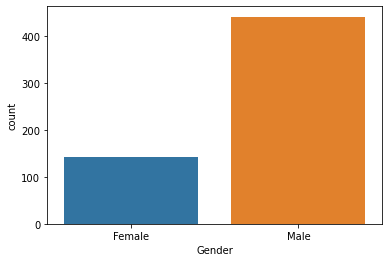

In [20]:
# check distribution of categorical feature "Gender"
sns.countplot(x=data.Gender)

### Insights:
* Male patients are substantially more than female patients.

<AxesSubplot:xlabel='Target', ylabel='count'>

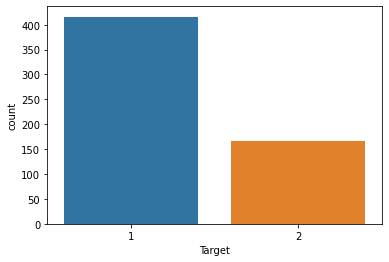

In [21]:
# check distribution of discrete feature "Target"
sns.countplot(x=data.Target)

### Insights
- Target-1 which refers to patients with liver disease are more than Target-2 which refers to patients without any liver disease.

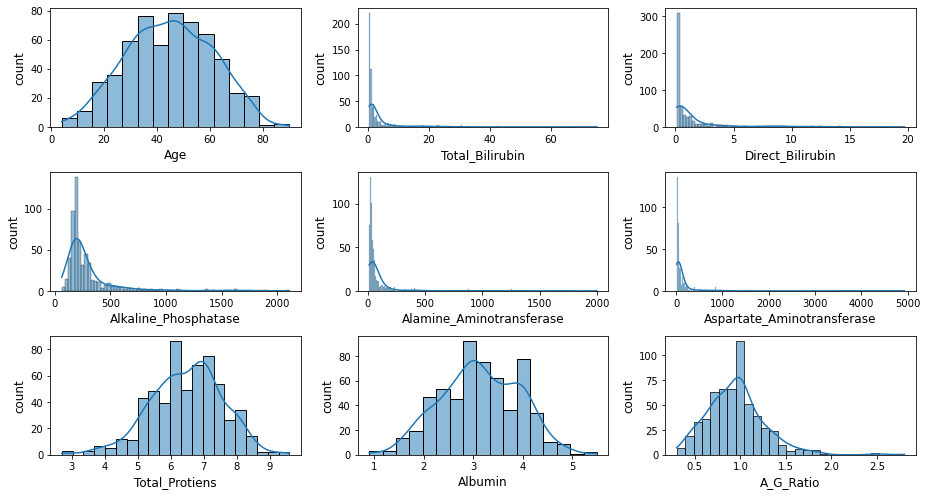

In [22]:
# check distribution of numerical features

plt.figure(figsize=(13,7),facecolor='white')
plotnumber=1
for column in num_col.drop('Target',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=12)
        plt.ylabel("count",fontsize=12)
    plotnumber+=1
plt.tight_layout()

### Insights
- Maximum patients are in the age group 25-65 years.
- Only Age feature has a normal distribution and all other features have not-normal or skewed distribution.

### B. Bivariate Analysis

#### For Categorical Columns

<AxesSubplot:xlabel='Gender', ylabel='count'>

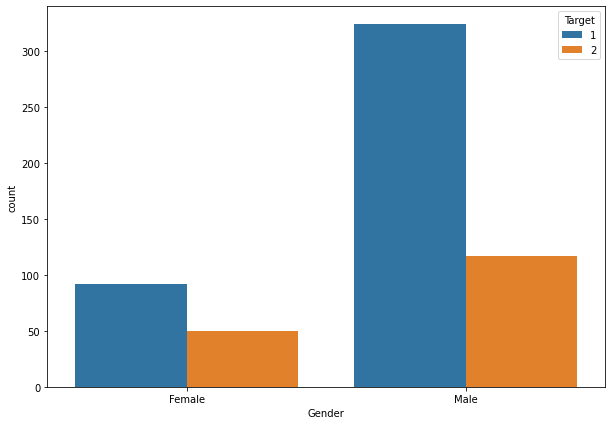

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,x='Gender',hue='Target')

### Insights
- Male patients with liver disease are substantially more than female patients with liver disease.
- Male patients without any disease are substantially more than female patients without any disease.

#### For Numerical Columns

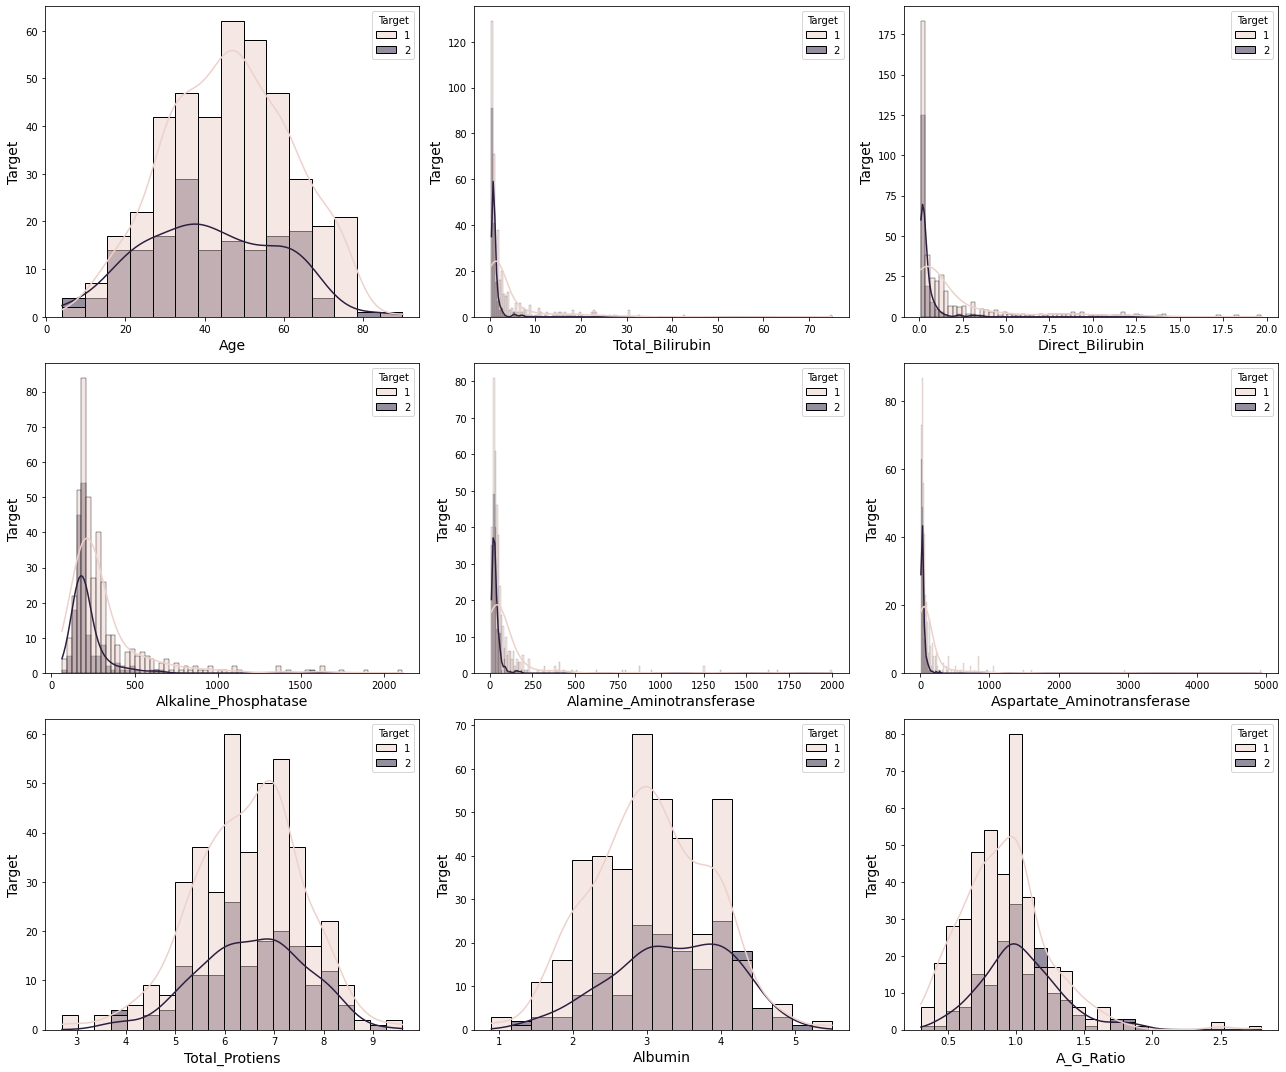

In [24]:
plt.figure(figsize=(18,15),facecolor='white')
plotnumber=1
for column in num_col.drop('Target',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],hue=data.Target,kde=True)
        plt.xlabel(column,fontsize=14)
        plt.ylabel("Target",fontsize=14)
    plotnumber+=1
plt.tight_layout()

### Insights

- *Age*: 
     * Maximum liver disease patients are 60 years old.
     * The largest group of liver disease patients are between 20 - 75 years old.
- *Total_Bilirubin*: 
     * Maximum patients with liver disease have Total_Bilirubin count between 0.6 - 1.1.
     * If the Total_Bilirubin is more then people are less likely to have liver disease.
- *Direct_Bilirubin*:
     * Maximum patients with liver disease have Direct_Bilirubin count of 0.2
     * If the Direct_Bilirubin is more then people are less likely to have liver disease.
- *Alkaline_Phosphotase*: 
     * Maximum patients with liver disease have Alkaline_Phosphatase count of 298.
- *Alamine_Aminotransferase*: 
     * Maximum patients have high chance of getting liver disease if the Alamine_Aminotransferase count is between 20-50.
     * If you have Alamine_Aminotransferase count more than 50, then chances of liver disease are less.
- *Aspartate_Aminotransferase*:
     * Maximum patients with liver disease have Aspartate_Aminotransferase count between 14-68.
- *Total_Protiens*:
     * Maximum patients with liver disease have Total_Protiens count between 5-8.
- *Albumin*: 
     * Maximum patients with liver disease have Albumin count between 2-4.
- *Albumin_and_Globulin_Ratio*:
     * Maximum patients with liver disease have A/G_Ratio count between 0.4-1.1

### C. Multivariate Analysis

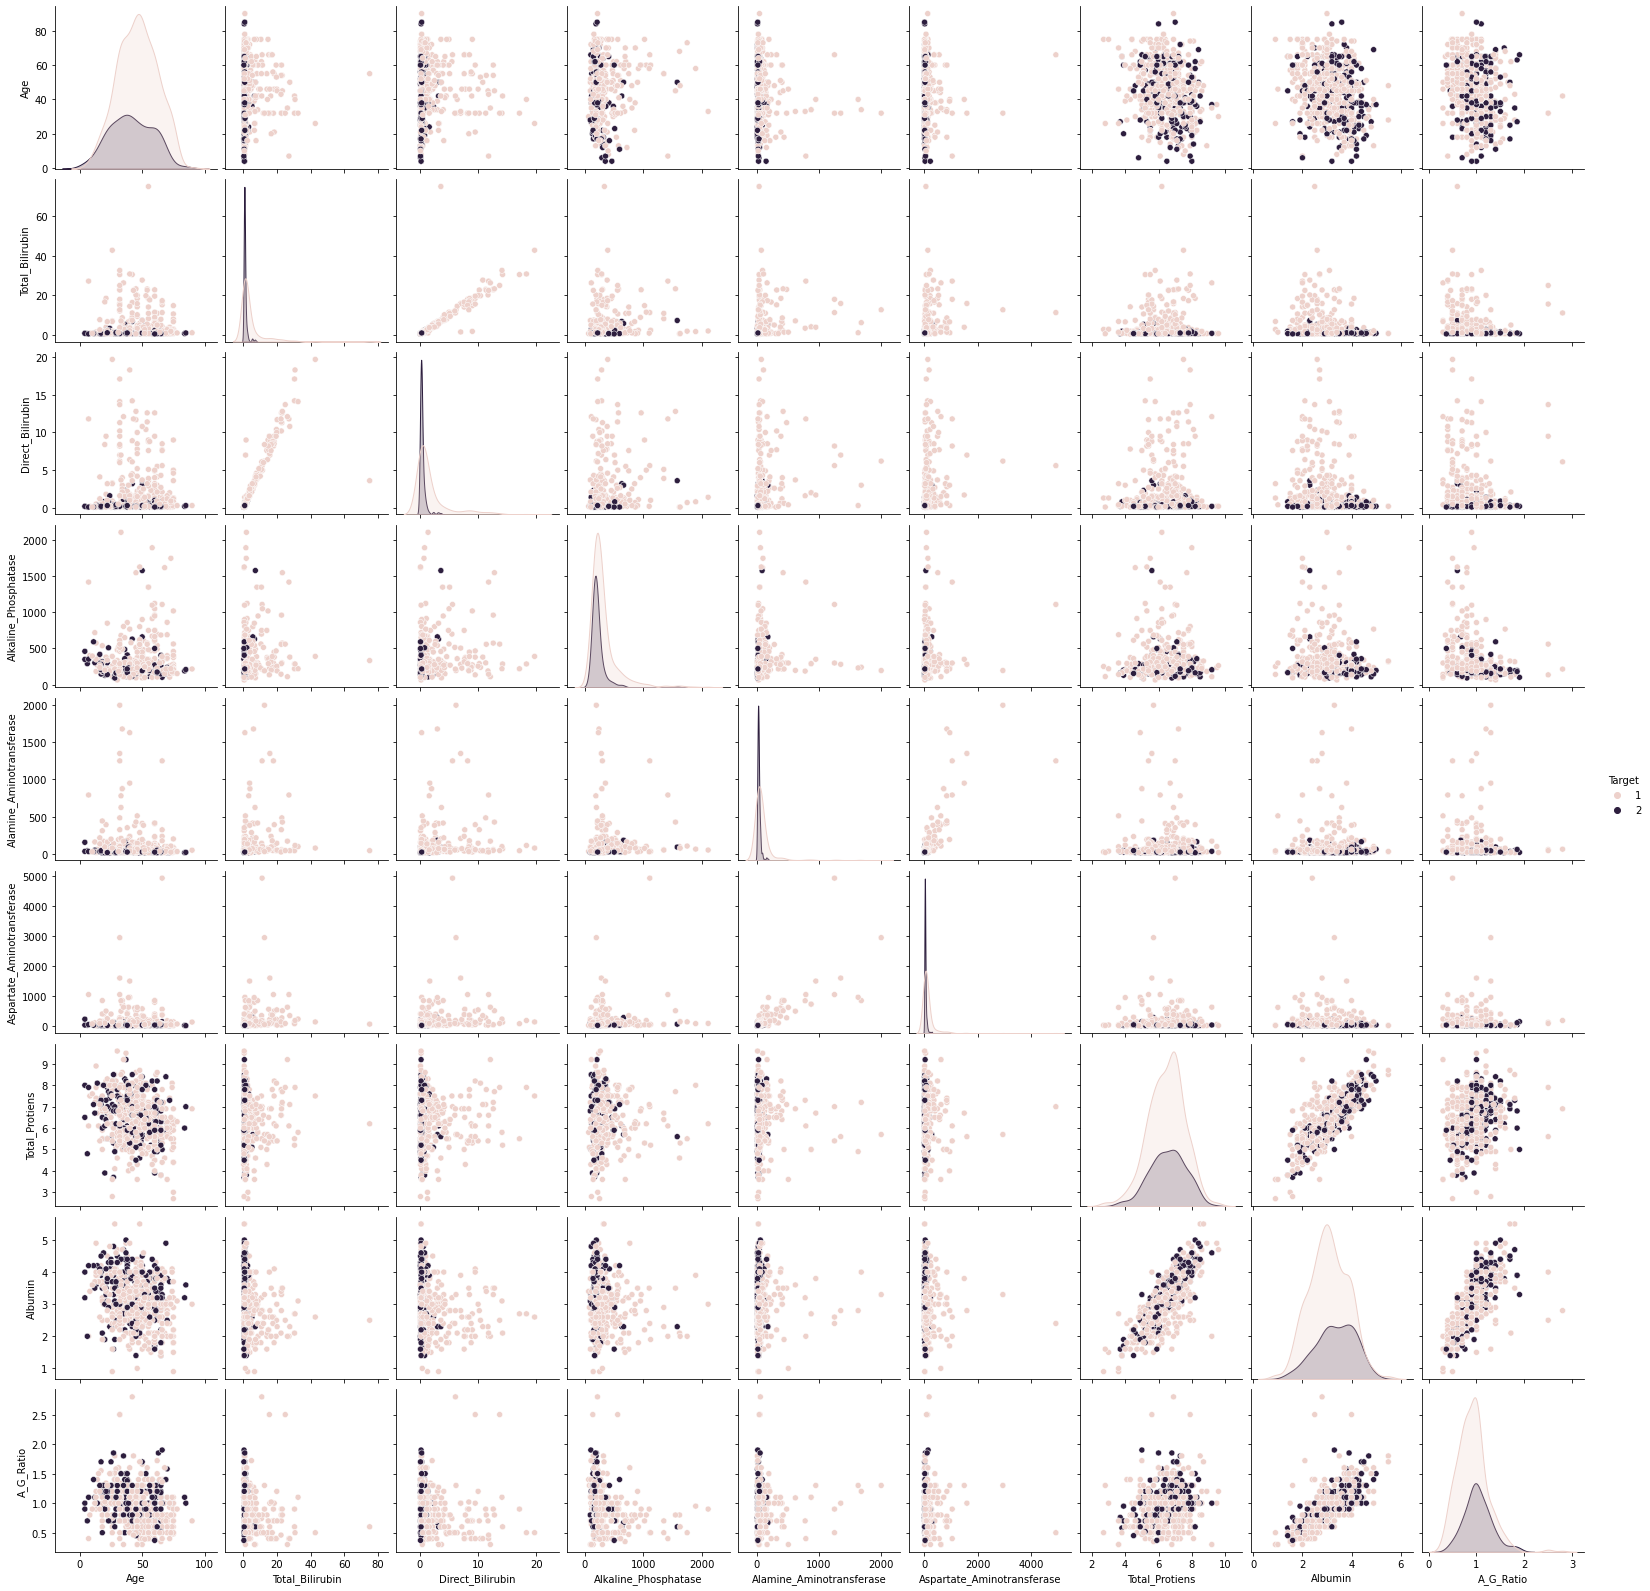

In [25]:
sns.pairplot(data, hue='Target')

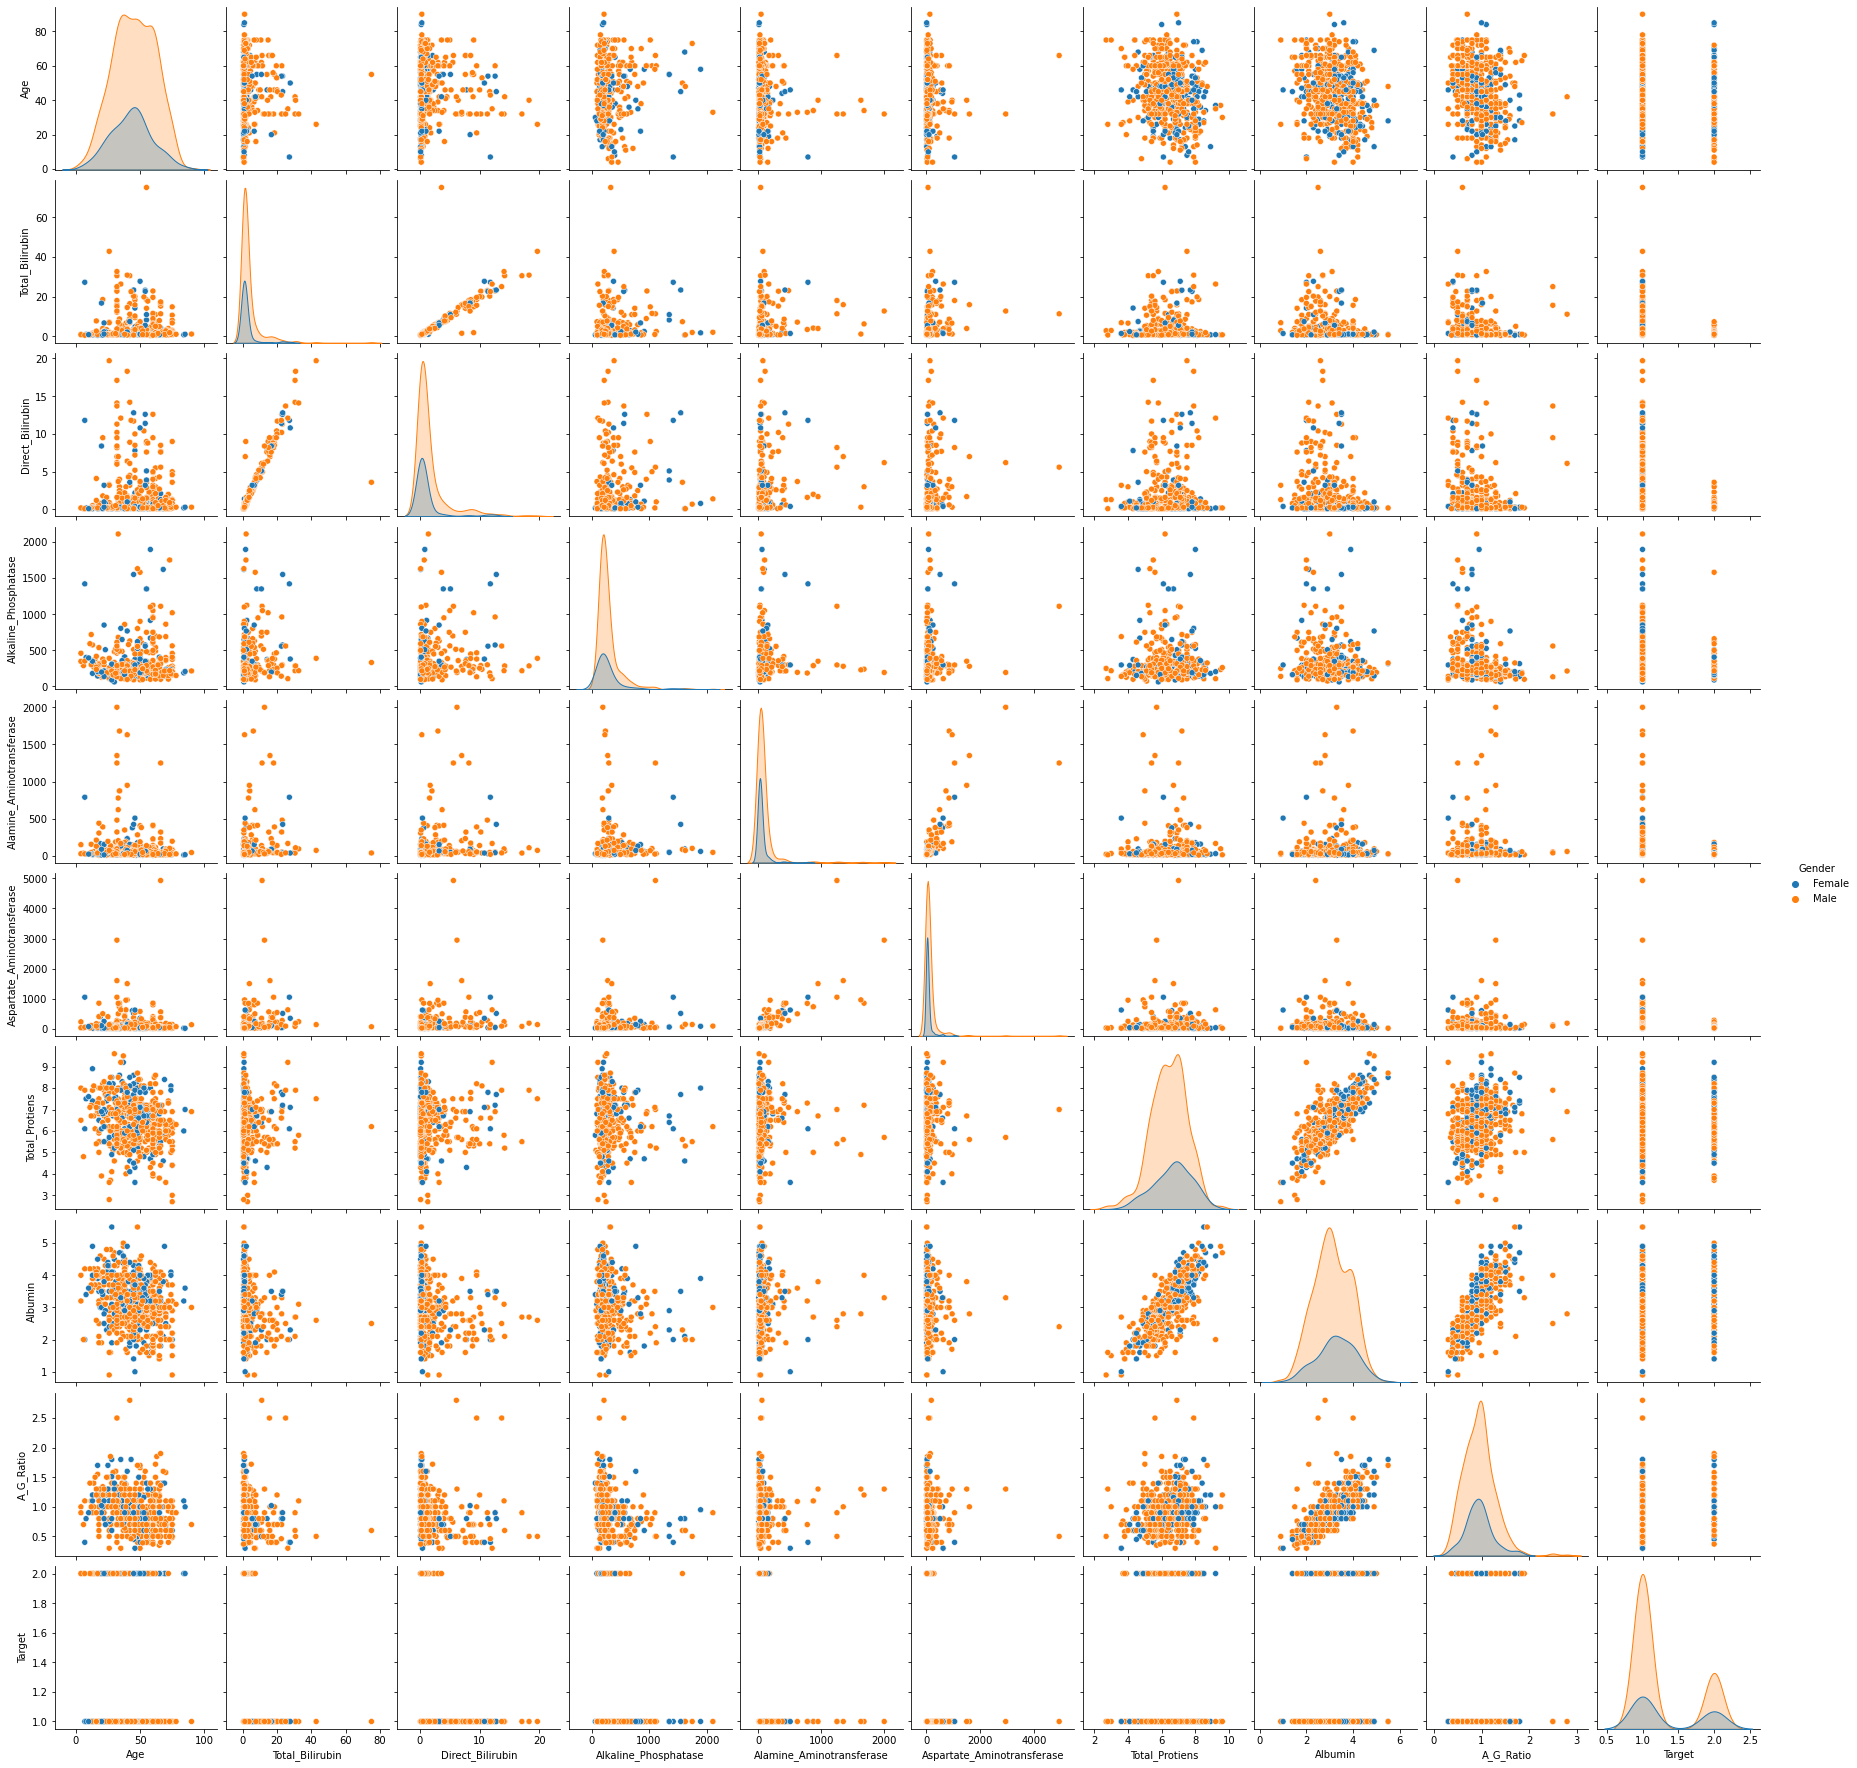

In [26]:
sns.pairplot(data, hue='Gender')

### Insights:
- The number of liver patients are higher than patients with no disease.
- The number of male patients are higher than female patients.

## 7. Data Preprocessing

### A. Check for missing values and handle them

In [27]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
A_G_Ratio                     4
Target                        0
dtype: int64

### Insights
- There are 4 missing values in A_G_Ratio feature which needs to be handled

In [28]:
# check percentage of missing values
data.isnull().sum()/len(data)*100

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphatase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
A_G_Ratio                     0.686106
Target                        0.000000
dtype: float64

In [29]:
# Impute the missing values in A_G_Ratio feature with median value since it has a skewed distribution.
data.loc[data['A_G_Ratio'].isnull()==True,'A_G_Ratio']=data.A_G_Ratio.median()

In [30]:
# Check if all missing values have been handled
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
A_G_Ratio                     0
Target                        0
dtype: int64

**All missing values have been handled**

### B. Check for duplicate values and handle them

In [31]:
data.duplicated().sum()

13

In [32]:
# Drop the duplicates
data.drop_duplicates(inplace=True)

In [33]:
# Check if all dupliates are removed
data.duplicated().sum()

0

In [34]:
data.shape

(570, 11)

**All duplicate values have been removed**

### C. Check for outliers and handle them

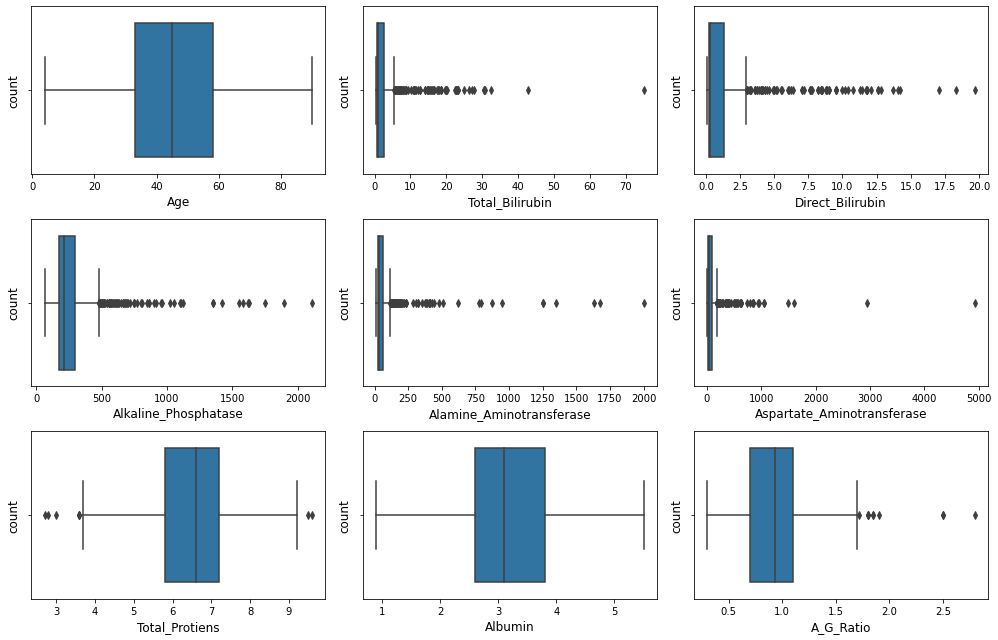

In [35]:
plt.figure(figsize=(14,9),facecolor='white')
plotnumber=1
for column in num_col.drop('Target',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=12)
        plt.ylabel("count",fontsize=12)
    plotnumber+=1
plt.tight_layout()

### Insights
- All features except "Age" and "Albumin" features have outliers.

### Handling Outliers
- Handle outliers only if the percentage of outliers is less than 5%
- Use either IQR(inter-quartile range) or 3 Sigma rule/Z-score to handle outliers
- Use IQR when data is not normal and replace data with median
- Use 3 sigma rule if data is normal and replace with mean

### Check and handle outliers for Total_Bilirubin

In [36]:
# find Q1 and Q3 in Total_Bilirubin
Q1 = data['Total_Bilirubin'].quantile(0.25)
Q3 = data['Total_Bilirubin'].quantile(0.75)

In [37]:
Q1

0.8

In [38]:
Q3

2.6

In [39]:
# find IQR
IQR = Q3-Q1
IQR

1.8

In [40]:
# find lower limit and upper limit
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower Limit', low_limit)
print('Upper Limit', upper_limit)

Lower Limit -1.9000000000000001
Upper Limit 5.300000000000001


In [41]:
# Find values less than lower limit
data.loc[data['Total_Bilirubin']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


In [42]:
# Find values greater than upper limit
data.loc[data['Total_Bilirubin']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
37,46,Female,14.2,7.8,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1


In [43]:
Outlier_Percentage_Total_Bilirubin = 83/570*100
Outlier_Percentage_Total_Bilirubin

14.561403508771932

### Insights
- There are 83 records greater than upper limit.
- **Outliers percentage in "Total_Bilirubin" = 14.56%**
- Since the outlier percentage is more than 5%, we will not handle outliers for Total_Bilirubin.

### Check and handle outliers for Direct_Bilirubin

In [44]:
# find Q1 and Q3 in Direct_Bilirubin
Q1 = data['Direct_Bilirubin'].quantile(0.25)
Q3 = data['Direct_Bilirubin'].quantile(0.75)

In [45]:
Q1

0.2

In [46]:
Q3

1.3

In [47]:
# find IQR
IQR = Q3-Q1
IQR

1.1

In [48]:
# find lower limit and upper limit
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower Limit', low_limit)
print('Upper Limit', upper_limit)

Lower Limit -1.4500000000000002
Upper Limit 2.95


In [49]:
# Find values less than lower limit
data.loc[data['Direct_Bilirubin']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


In [50]:
# Find values greater than upper limit
data.loc[data['Direct_Bilirubin']>upper_limit].shape

(80, 11)

In [51]:
Outlier_Percent_Direct_Bilirubin = 80/570*100
Outlier_Percent_Direct_Bilirubin

14.035087719298245

### Insights
- There are 80 records greater than upper limit.
- **Outliers percentage = 14.03%**
- Since the outlier percentage is more than 5%, we will not be handling outliers for Direct_Bilirubin.

### Check and handle outliers for Alkaline_Phosphatase

In [52]:
# find Q1 and Q3 in Alkaline_Phosphatase
Q1 = data['Alkaline_Phosphatase'].quantile(0.25)
Q3 = data['Alkaline_Phosphatase'].quantile(0.75)

In [53]:
Q1

176.0

In [54]:
Q3

298.0

In [55]:
# find IQR
IQR = Q3-Q1
IQR

122.0

In [56]:
# find lower limit and upper limit
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower Limit', low_limit)
print('Upper Limit', upper_limit)

Lower Limit -7.0
Upper Limit 481.0


In [57]:
# Find values less than lower limit
data.loc[data['Alkaline_Phosphatase']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


In [58]:
# Find values greater than upper limit
data.loc[data['Alkaline_Phosphatase']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
20,51,Male,2.2,1.0,610,17,28,7.3,2.6,0.55,1
21,51,Male,2.9,1.3,482,22,34,7.0,2.4,0.50,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
...,...,...,...,...,...,...,...,...,...,...,...
549,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.60,1
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1


In [59]:
Outlier_Percent_Alkaline_Phosphatase = 69/570*100
Outlier_Percent_Alkaline_Phosphatase

12.105263157894736

### Insights
- There are 69 records greater than upper limit.
- **Outliers percentage= 12.10%**
- Since the outlier percentage is more than 5%, we will not be handling outliers for Alkaline_Phosphatase.

### Check and handle outliers for Alamine_Aminotransferase

In [60]:
# find Q1 and Q3 in Alamine_Aminotransferase
Q1 = data['Alamine_Aminotransferase'].quantile(0.25)
Q3 = data['Alamine_Aminotransferase'].quantile(0.75)

In [61]:
Q1

23.0

In [62]:
Q3

60.0

In [63]:
# find IQR
IQR = Q3-Q1
IQR

37.0

In [64]:
# find lower limit and upper limit
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower Limit', low_limit)
print('Upper Limit', upper_limit)

Lower Limit -32.5
Upper Limit 115.5


In [65]:
# Find values less than lower limit
data.loc[data['Alamine_Aminotransferase']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


In [66]:
# Find values greater than upper limit
data.loc[data['Alamine_Aminotransferase']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
16,38,Male,1.8,0.8,342,168,441,7.6,4.4,1.3,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.9,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.1,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.2,1
...,...,...,...,...,...,...,...,...,...,...,...
560,66,Male,15.2,7.7,356,321,562,6.5,2.2,0.4,1
561,66,Male,16.6,7.6,315,233,384,6.9,2.0,0.4,1
562,66,Male,17.3,8.5,388,173,367,7.8,2.6,0.5,1
569,16,Male,7.7,4.1,268,213,168,7.1,4.0,1.2,1


In [67]:
Outlier_Percent_Alamine_Aminotransferase = 72/570*100
Outlier_Percent_Alamine_Aminotransferase

12.631578947368421

### Insights
- There are 72 records greater than upper limit.
- **Outlier percentage = 12.63%**
- Since the outlier percentage is more than 5%, we will not be handling outliers for Alamine_Aminotransferase.

### Check and handle outliers for Aspartate_Aminotransferase

In [68]:
# find Q1 and Q3 in Aspartate_Aminotransferase
Q1 = data['Aspartate_Aminotransferase'].quantile(0.25)
Q3 = data['Aspartate_Aminotransferase'].quantile(0.75)

In [69]:
Q1

25.0

In [70]:
Q3

86.75

In [71]:
# find IQR
IQR = Q3-Q1
IQR

61.75

In [72]:
# find lower limit and upper limit
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower Limit', low_limit)
print('Upper Limit', upper_limit)

Lower Limit -67.625
Upper Limit 179.375


In [73]:
# Find values less than lower limit
data.loc[data['Aspartate_Aminotransferase']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


In [74]:
# Find values greater than upper limit
data.loc[data['Aspartate_Aminotransferase']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
16,38,Male,1.8,0.8,342,168,441,7.6,4.4,1.3,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.8,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.1,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.2,1
43,50,Male,2.6,1.2,415,407,576,6.4,3.2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
548,42,Male,11.1,6.1,214,60,186,6.9,2.8,2.8,1
558,51,Male,4.0,2.5,275,382,330,7.5,4.0,1.1,1
560,66,Male,15.2,7.7,356,321,562,6.5,2.2,0.4,1
561,66,Male,16.6,7.6,315,233,384,6.9,2.0,0.4,1


In [75]:
Outlier_Percent_Aspartate_Aminotransferase = 66/570*100
Outlier_Percent_Aspartate_Aminotransferase

11.578947368421053

### Insights
- There are 66 records greater than upper limit.
- **Outliers percentage = 11.57%**
- Since the outlier percentage is more than 5%, we will not be handling outliers for Aspartate_Aminotransferase.

### Check and handle outliers for Total_Protiens

In [76]:
# find Q1 and Q3 in Total_Protiens
Q1 = data['Total_Protiens'].quantile(0.25)
Q3 = data['Total_Protiens'].quantile(0.75)

In [77]:
Q1

5.8

In [78]:
Q3

7.2

In [79]:
# find IQR
IQR = Q3-Q1
IQR

1.4000000000000004

In [80]:
# find lower limit and upper limit
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower Limit', low_limit)
print('Upper Limit', upper_limit)

Lower Limit 3.6999999999999993
Upper Limit 9.3


In [81]:
# Find values less than lower limit
data.loc[data['Total_Protiens']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
180,75,Male,2.8,1.3,250,23,29,2.7,0.9,0.5,1
181,75,Male,2.9,1.3,218,33,37,3.0,1.5,1.0,1
269,26,Male,0.6,0.1,110,15,20,2.8,1.6,1.3,1
415,70,Male,1.3,0.3,690,93,40,3.6,2.7,0.7,1
458,26,Male,6.8,3.2,140,37,19,3.6,0.9,0.3,1
533,46,Female,1.4,0.4,298,509,623,3.6,1.0,0.3,1


In [82]:
# Find values greater than upper limit
data.loc[data['Total_Protiens']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
270,37,Male,0.7,0.2,235,96,54,9.5,4.9,1.0,1
273,30,Male,0.7,0.2,262,15,18,9.6,4.7,1.2,1


In [83]:
Outlier_Percent_Total_Protiens = 8/570*100
Outlier_Percent_Total_Protiens

1.4035087719298245

### Insights
- There are 2 records greater than upper limit and 6 records less than lower limit.  So a total of 8 outliers.
- **Outliers percentage = 1.40%**
- Since the outlier percentage is less than 5%, we will handle outliers for Total_Protiens. 

In [84]:
# Since the distribution for Total_Protiens is not normal we will replace the outliers with median value
data.loc[data['Total_Protiens']<low_limit,'Total_Protiens']=data['Total_Protiens'].median()
data.loc[data['Total_Protiens']>upper_limit,'Total_Protiens']=data['Total_Protiens'].median()

In [85]:
# Check if outliers have been replaced
data.loc[data['Total_Protiens']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


In [86]:
data.loc[data['Total_Protiens']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


<AxesSubplot:xlabel='Total_Protiens'>

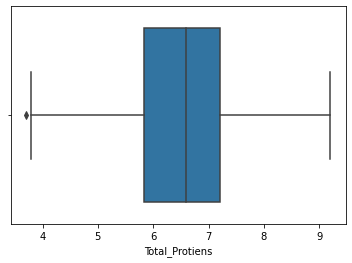

In [87]:
# Check the box plot for Total_Protiens
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='Total_Protiens')

### Insights
- All outliers for "Total_Protiens" have been handled

### Check and handle outliers for A_G_Ratio

In [88]:
# find Q1 and Q3 in A_G_Ratio
Q1 = data['A_G_Ratio'].quantile(0.25)
Q3 = data['A_G_Ratio'].quantile(0.75)

In [89]:
Q1

0.7

In [90]:
Q3

1.1

In [91]:
# find IQR
IQR = Q3-Q1
IQR

0.40000000000000013

In [92]:
# find lower limit and upper limit
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('Lower Limit', low_limit)
print('Upper Limit', upper_limit)

Lower Limit 0.09999999999999976
Upper Limit 1.7000000000000002


In [93]:
# Find values less than lower limit
data.loc[data['A_G_Ratio']<low_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


In [94]:
# Find values greater than upper limit
data.loc[data['A_G_Ratio']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2
215,66,Male,0.6,0.2,100,17,148,5.0,3.3,1.90,2
238,35,Female,0.9,0.2,190,40,35,7.3,4.7,1.80,2
243,28,Female,0.9,0.2,316,25,23,8.5,5.5,1.80,1
267,43,Female,0.9,0.3,140,12,29,7.4,3.5,1.80,1
484,62,Male,5.0,2.1,103,18,40,5.0,2.1,1.72,1
491,27,Male,1.0,0.3,180,56,111,6.8,3.9,1.85,2
548,42,Male,11.1,6.1,214,60,186,6.9,2.8,2.80,1
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1


In [95]:
Outlier_Percent_A_G_Ratio = 10/570*100
Outlier_Percent_A_G_Ratio

1.7543859649122806

### Insights
- There are 10 records greater than upper limit.
- **Outliers percentage = 1.75%**
- Since the outlier percentage is less than 5%, we will handle outliers for Total_Protiens. 

In [96]:
# The distribution for Total_Protiens is not normal so we will replace the outliers with median value
data.loc[data['A_G_Ratio']>upper_limit,'A_G_Ratio']=data['A_G_Ratio'].median()

In [97]:
data.loc[data['A_G_Ratio']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target


<AxesSubplot:xlabel='A_G_Ratio'>

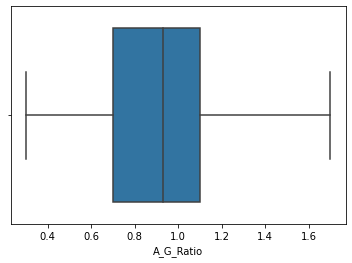

In [98]:
# Check the box plot for Total_Protiens
plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='A_G_Ratio')

### Insights
- All outliers in A_G Ratio have been handled.

### D. Scaling data

In [99]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Age','Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphatase', 
      'Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 
      'Albumin', 'A_G_Ratio']]=scale.fit_transform(data[['Age','Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphatase', 
      'Alamine_Aminotransferase','Aspartate_Aminotransferase', 'Total_Protiens', 
      'Albumin', 'A_G_Ratio']])
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
0,0.709302,Female,0.004021,0.000000,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571,1
1,0.674419,Male,0.140751,0.275510,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286,1
2,0.674419,Male,0.092493,0.204082,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429,1
3,0.627907,Male,0.008043,0.015306,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000,1
4,0.790698,Male,0.046917,0.096939,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429,1


### E. Convert categorical data to numerical data

In [100]:
## Using label encoder to convert the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

data.Gender=LE.fit_transform(data.Gender)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429,1


### F. Converting the target column values to 0 and 1 for better compatability in algorithms
- We will make it "0" for patients without any disease and "1" for patients with liver disease

In [101]:
data.Target=data.Target.map({1:1,2:0})
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.563636,0.521739,0.428571,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.690909,0.500000,0.314286,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.600000,0.521739,0.421429,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.563636,0.543478,0.500000,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.654545,0.326087,0.071429,1


## 8. Feature Engineering

### A. Check Correlation

In [102]:
# check for multicollinearity
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,A_G_Ratio,Target
Age,1.000000,0.058237,0.011500,0.007050,0.081673,-0.083383,-0.016753,-0.184729,-0.271170,-0.232899,0.138093
Gender,0.058237,1.000000,0.090298,0.101730,-0.023014,0.084317,0.081497,-0.089687,-0.091369,-0.008263,0.078501
Total_Bilirubin,0.011500,0.090298,1.000000,0.874116,0.206239,0.217471,0.238678,-0.009134,-0.224124,-0.294127,0.224430
Direct_Bilirubin,0.007050,0.101730,0.874116,1.000000,0.234609,0.237450,0.258489,-0.001493,-0.230751,-0.306391,0.250666
Alkaline_Phosphatase,0.081673,-0.023014,0.206239,0.234609,1.000000,0.126830,0.167230,-0.032880,-0.168318,-0.252266,0.187560
Alamine_Aminotransferase,-0.083383,0.084317,0.217471,0.237450,0.126830,1.000000,0.791857,-0.030864,-0.027973,0.007870,0.161917
Aspartate_Aminotransferase,-0.016753,0.081497,0.238678,0.258489,0.167230,0.791857,1.000000,-0.020063,-0.085180,-0.080137,0.151101
Total_Protiens,-0.184729,-0.089687,-0.009134,-0.001493,-0.032880,-0.030864,-0.020063,1.000000,0.741808,0.239866,-0.024621
Albumin,-0.271170,-0.091369,-0.224124,-0.230751,-0.168318,-0.027973,-0.085180,0.741808,1.000000,0.751469,-0.166835
A_G_Ratio,-0.232899,-0.008263,-0.294127,-0.306391,-0.252266,0.007870,-0.080137,0.239866,0.751469,1.000000,-0.188917


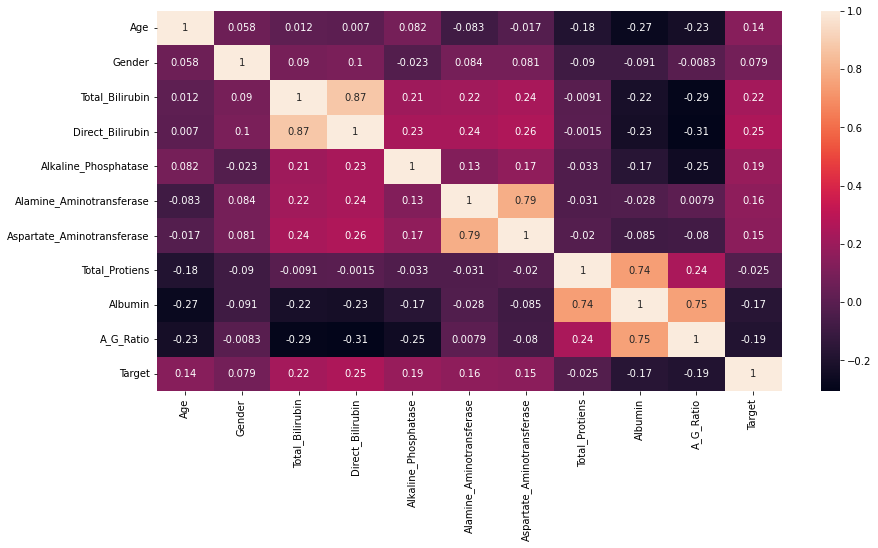

In [103]:
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot= True)
plt.show()

### Insights
- Total_Bilirubin and Direct_Bilirubin features are highly correlated.
- Alamine_Aminotransferase and Aspartate_Aminotransferase features are highly correlated.
- A_G_Ratio and Albumin features are highly correlated.
- The above features are above 0.75 and hence they are highly correlated.

In [104]:
# Dropping Total_Bilirubin, Alamine_Aminotransferase and Albumin because of high correlation
data.drop(["Total_Bilirubin","Alamine_Aminotransferase","Albumin"],axis=1, inplace=True)

In [105]:
data.head()

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphatase,Aspartate_Aminotransferase,Total_Protiens,A_G_Ratio,Target
0,0.709302,0,0.000000,0.060576,0.001626,0.563636,0.428571,1
1,0.674419,1,0.275510,0.310699,0.018296,0.690909,0.314286,1
2,0.674419,1,0.204082,0.208598,0.011791,0.600000,0.421429,1
3,0.627907,1,0.015306,0.058134,0.002033,0.563636,0.500000,1
4,0.790698,1,0.096939,0.064485,0.009961,0.654545,0.071429,1


## 9. Split Data

In [106]:
x= data.drop('Target', axis=1)
y= data['Target']
x.head()

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphatase,Aspartate_Aminotransferase,Total_Protiens,A_G_Ratio
0,0.709302,0,0.000000,0.060576,0.001626,0.563636,0.428571
1,0.674419,1,0.275510,0.310699,0.018296,0.690909,0.314286
2,0.674419,1,0.204082,0.208598,0.011791,0.600000,0.421429
3,0.627907,1,0.015306,0.058134,0.002033,0.563636,0.500000
4,0.790698,1,0.096939,0.064485,0.009961,0.654545,0.071429


In [107]:
y.head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    1
12    0
13    1
14    1
Name: Target, dtype: int64

In [376]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state= 9)
x_test.shape

(143, 7)

In [377]:
x_train.shape

(427, 7)

In [378]:
y_train.shape

(427,)

In [379]:
y_test.shape

(143,)

In [380]:
data.shape

(570, 8)

## 10.  Balancing data

In [381]:
data.Target.value_counts()

1    406
0    164
Name: Target, dtype: int64

**Data in target column is imbalanced so we need to balance it using smote**

### Using Smote

In [382]:
# Install imblearn package
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [383]:
# Apply smote on training data(x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [384]:
from collections import Counter # Counter is a container which keeps track as to how many times equivalent values are added.
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 300, 0: 127})
SMOTE Classes Counter({1: 300, 0: 300})


In [385]:
x_smote.shape

(600, 7)

In [386]:
y_smote.shape

(600,)

## 10. Model Building and Evaluation

### A. Logistic Regression Model

In [387]:
# import Logistic regression model
from sklearn.linear_model import LogisticRegression
# initialize the model
LR=LogisticRegression()
# train model with x_smote,y_smote
LR.fit(x_smote,y_smote)

LogisticRegression()

In [388]:
# make predictions using x_test
y_pred = LR.predict(x_test)

In [389]:
LR_Training_Score = LR.score(x_smote,y_smote)*100
LR_Training_Score

68.16666666666666

In [390]:
LR_Testing_Score = LR.score(x_test,y_test)*100
LR_Testing_Score

72.02797202797203

### Evaluate the Model (Logistic Regression)

In [391]:
confusion_matrix(y_test,y_pred)

array([[30,  7],
       [33, 73]], dtype=int64)

In [392]:
# Checking Accuracy, Precision, Recall, F1 and ROC_AUC score for testing data
LR_Accuracy_Score = accuracy_score(y_test,y_pred)*100
LR_Precision_Score= precision_score(y_test,y_pred)*100
LR_Recall_Score= recall_score(y_test,y_pred)*100
LR_F1_Score = f1_score(y_test,y_pred)*100
LR_ROC_AUC_Score= roc_auc_score(y_test,y_pred)*100

print('LR_Accuracy_Score:',LR_Accuracy_Score)
print('LR_Precision_Score:',LR_Precision_Score)
print('LR_Recall_Score:',LR_Recall_Score)
print('LR_F1_Score:',LR_F1_Score)
print('LR_ROC_AUC_Score:',LR_ROC_AUC_Score)

LR_Accuracy_Score: 72.02797202797203
LR_Precision_Score: 91.25
LR_Recall_Score: 68.86792452830188
LR_F1_Score: 78.49462365591397
LR_ROC_AUC_Score: 74.97450280469147


In [393]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.81      0.60        37
           1       0.91      0.69      0.78       106

    accuracy                           0.72       143
   macro avg       0.69      0.75      0.69       143
weighted avg       0.80      0.72      0.74       143



In [473]:
## checking cross validation score for f1
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LR,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.84536082 0.82474227 0.84536082 0.83673469 0.84536082 0.8125
 0.83333333 0.82105263 0.82474227 0.82474227]
cross validation score 0.8313929937140347
standard deviation 0.011018912586379319


In [395]:
## checking cross validation score for Precision
scores=cross_val_score(LR,x,y,cv=10,scoring='precision')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.73214286 0.71428571 0.73214286 0.71929825 0.73214286 0.70909091
 0.71428571 0.70909091 0.70175439 0.70175439]
cross validation score 0.716598883572568
standard deviation 0.01138547751687919


In [396]:
## checking cross validation score for recall
scores=cross_val_score(LR,x,y,cv=10,scoring='recall')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[1.         0.97560976 1.         1.         1.         0.95121951
 1.         0.975      1.         1.        ]
cross validation score 0.9901829268292683
standard deviation 0.016234748940797704


In [397]:
## checking cross validation score for accuracy
scores=cross_val_score(LR,x,y,cv=10,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.73684211 0.70175439 0.73684211 0.71929825 0.73684211 0.68421053
 0.71929825 0.70175439 0.70175439 0.70175439]
cross validation score 0.7140350877192982
standard deviation 0.017631360738808572


### Insights
- The training score is 68.16% and the testing scores for all other metrics are as follows:-
    
    - LR_Accuracy_Score: 72.02%
    - LR_Precision_Score: 91.25%
    - LR_Recall_Score: 68.86%
    - LR_F1_Score: 78.49%
    - LR_ROC_AUC_Score: 74.97%

### B. Random Forest Classifier Model

In [398]:
# import Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
# initialize the model
RFC=RandomForestClassifier()
# train model with x_smote,y_smote
RFC.fit(x_smote,y_smote)

RandomForestClassifier()

In [399]:
# make predictions using x_test
y_pred = RFC.predict(x_test)

In [400]:
RFC_Training_Score = RFC.score(x_smote,y_smote)*100
RFC_Training_Score

100.0

In [401]:
RFC_Testing_Score = RFC.score(x_test,y_test)*100
RFC_Testing_Score

73.42657342657343

### Evaluate the Model (Random Forest Classifier)

In [402]:
confusion_matrix(y_test,y_pred)

array([[18, 19],
       [19, 87]], dtype=int64)

In [403]:
# Checking Accuracy, Precision, Recall, F1 and ROC_AUC score for testing data
RFC_Accuracy_Score = accuracy_score(y_test,y_pred)*100
RFC_Precision_Score= precision_score(y_test,y_pred)*100
RFC_Recall_Score= recall_score(y_test,y_pred)*100
RFC_F1_Score = f1_score(y_test,y_pred)*100
RFC_ROC_AUC_Score= roc_auc_score(y_test,y_pred)*100

print('RFC_Accuracy_Score:',RFC_Accuracy_Score)
print('RFC_Precision_Score:',RFC_Precision_Score)
print('RFC_Recall_Score:',RFC_Recall_Score)
print('RFC_F1_Score:',RFC_F1_Score)
print('RFC_ROC_AUC_Score:',RFC_ROC_AUC_Score)

RFC_Accuracy_Score: 73.42657342657343
RFC_Precision_Score: 82.0754716981132
RFC_Recall_Score: 82.0754716981132
RFC_F1_Score: 82.0754716981132
RFC_ROC_AUC_Score: 65.36206017338093


In [404]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49        37
           1       0.82      0.82      0.82       106

    accuracy                           0.73       143
   macro avg       0.65      0.65      0.65       143
weighted avg       0.73      0.73      0.73       143



In [405]:
## checking cross validation score for f1
scores=cross_val_score(RFC,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.81818182 0.77272727 0.8        0.8372093  0.77647059 0.77647059
 0.725      0.74698795 0.79069767 0.83870968]
cross validation score 0.7882454873350448
standard deviation 0.034935286948372855


In [406]:
## checking cross validation score for Precision
scores=cross_val_score(RFC,x,y,cv=10,scoring='precision')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.73913043 0.74468085 0.77777778 0.8        0.72340426 0.77272727
 0.75675676 0.70454545 0.69387755 0.76470588]
cross validation score 0.7477606236346198
standard deviation 0.0317325100598381


In [407]:
## checking cross validation score for Recall
scores=cross_val_score(RFC,x,y,cv=10,scoring='recall')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.80487805 0.85365854 0.90243902 0.87804878 0.85365854 0.80487805
 0.7        0.725      0.85       0.975     ]
cross validation score 0.8347560975609756
standard deviation 0.07685152600550865


In [408]:
## checking cross validation score for Accuracy
scores=cross_val_score(RFC,x,y,cv=10,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.66666667 0.66666667 0.71929825 0.71929825 0.73684211 0.70175439
 0.68421053 0.61403509 0.63157895 0.75438596]
cross validation score 0.6894736842105263
standard deviation 0.04300930060396935


### Insights
- The training score is 100% and testing score for all other metrics is as follows:-
    - RFC_Accuracy_Score: 73.42%
    - RFC_Precision_Score: 82.07%
    - RFC_Recall_Score: 82.07%
    - RFC_F1_Score: 82.07%
    - RFC_ROC_AUC_Score: 65.36%

### C. Support Vector Classifier Model

In [409]:
# import SVC Classifier model
from sklearn.svm import SVC
# initialize the model
svclassifier = SVC()
# train model with x_smote,y_smote
svclassifier.fit(x_smote, y_smote)

SVC()

In [410]:
# make predictions using x_test
y_pred = svclassifier.predict(x_test)

In [411]:
SVC_Training_Score = svclassifier.score(x_smote,y_smote)*100
SVC_Training_Score

67.66666666666666

In [412]:
SVC_Testing_Score = svclassifier.score(x_test,y_test)*100
SVC_Testing_Score

62.93706293706294

### Evaluate the Model (Support Vector Classifier)

In [413]:
confusion_matrix(y_test,y_pred)

array([[34,  3],
       [50, 56]], dtype=int64)

In [414]:
# Checking Accuracy, Precision, Recall, F1 and ROC_AUC score for testing data
SVC_Accuracy_Score = accuracy_score(y_test,y_pred)*100
SVC_Precision_Score= precision_score(y_test,y_pred)*100
SVC_Recall_Score= recall_score(y_test,y_pred)*100
SVC_F1_Score = f1_score(y_test,y_pred)*100
SVC_ROC_AUC_Score= roc_auc_score(y_test,y_pred)*100

print('SVC_Accuracy_Score:',SVC_Accuracy_Score)
print('SVC_Precision_Score:',SVC_Precision_Score)
print('SVC_Recall_Score:',SVC_Recall_Score)
print('SVC_F1_Score:',SVC_F1_Score)
print('SVC_ROC_AUC_Score:',SVC_ROC_AUC_Score)

SVC_Accuracy_Score: 62.93706293706294
SVC_Precision_Score: 94.91525423728814
SVC_Recall_Score: 52.83018867924528
SVC_F1_Score: 67.87878787878788
SVC_ROC_AUC_Score: 72.36104028556858


In [415]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.92      0.56        37
           1       0.95      0.53      0.68       106

    accuracy                           0.63       143
   macro avg       0.68      0.72      0.62       143
weighted avg       0.81      0.63      0.65       143



In [416]:
## checking cross validation score for f1
scores=cross_val_score(svclassifier,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.83673469 0.83673469 0.83673469 0.83673469 0.83673469 0.83673469
 0.82474227 0.82474227 0.82474227 0.82474227]
cross validation score 0.8319377235430254
standard deviation 0.005875064815427819


In [417]:
## checking cross validation score for Precision
scores=cross_val_score(svclassifier,x,y,cv=10,scoring='precision')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.71929825 0.71929825 0.71929825 0.71929825 0.71929825 0.71929825
 0.70175439 0.70175439 0.70175439 0.70175439]
cross validation score 0.712280701754386
standard deviation 0.008594700851870828


In [418]:
## checking cross validation score for recall
scores=cross_val_score(svclassifier,x,y,cv=10,scoring='recall')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
cross validation score 1.0
standard deviation 0.0


In [419]:
## checking cross validation score for accuracy
scores=cross_val_score(svclassifier,x,y,cv=10,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.71929825 0.71929825 0.71929825 0.71929825 0.71929825 0.71929825
 0.70175439 0.70175439 0.70175439 0.70175439]
cross validation score 0.712280701754386
standard deviation 0.008594700851870828


### Insights
- The training score is 67.66% and testing score for all other metrics is as follows:-
    - SVC_Accuracy_Score: 62.93%
    - SVC_Precision_Score: 94.91%
    - SVC_Recall_Score: 52.83%
    - SVC_F1_Score: 67.87%
    - SVC_ROC_AUC_Score: 72.36%

### D. KNN Classifier Model

In [420]:
# import KNN Classifier model
from sklearn.neighbors import KNeighborsClassifier
# initialize the model
KNC = KNeighborsClassifier(n_neighbors=11)
# train model with x_smote,y_smote
KNC.fit(x_smote, y_smote)

KNeighborsClassifier(n_neighbors=11)

In [421]:
# make predictions using x_test
y_pred = KNC.predict(x_test)

In [422]:
KNN_Training_Score=KNC.score(x_smote,y_smote)*100
KNN_Training_Score

71.83333333333334

In [423]:
KNN_Testing_Score = KNC.score(x_test,y_test)*100
KNN_Testing_Score

61.53846153846154

### Evaluate the Model (KNN Classifier)

In [424]:
confusion_matrix(y_test,y_pred)

array([[27, 10],
       [45, 61]], dtype=int64)

In [425]:
# Checking Accuracy, Precision, Recall, F1 and ROC_AUC score for testing data
KNN_Accuracy_Score = accuracy_score(y_test,y_pred)*100
KNN_Precision_Score= precision_score(y_test,y_pred)*100
KNN_Recall_Score= recall_score(y_test,y_pred)*100
KNN_F1_Score = f1_score(y_test,y_pred)*100
KNN_ROC_AUC_Score= roc_auc_score(y_test,y_pred)*100

print('KNN_Accuracy_Score:',KNN_Accuracy_Score)
print('KNN_Precision_Score:',KNN_Precision_Score)
print('KNN_Recall_Score:',KNN_Recall_Score)
print('KNN_F1_Score:',KNN_F1_Score)
print('KNN_ROC_AUC_Score:',KNN_ROC_AUC_Score)

KNN_Accuracy_Score: 61.53846153846154
KNN_Precision_Score: 85.91549295774648
KNN_Recall_Score: 57.54716981132076
KNN_F1_Score: 68.92655367231639
KNN_ROC_AUC_Score: 65.26007139214687


In [426]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.73      0.50        37
           1       0.86      0.58      0.69       106

    accuracy                           0.62       143
   macro avg       0.62      0.65      0.59       143
weighted avg       0.73      0.62      0.64       143



In [427]:
## checking cross validation score for f1
scores=cross_val_score(KNC,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.7816092  0.77108434 0.8        0.77272727 0.79545455 0.83146067
 0.79518072 0.71428571 0.81318681 0.77777778]
cross validation score 0.7852767053232689
standard deviation 0.029662608477881533


In [428]:
## checking cross validation score for Precision
scores=cross_val_score(KNC,x,y,cv=10,scoring='precision')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.73913043 0.76190476 0.73469388 0.72340426 0.74468085 0.77083333
 0.76744186 0.68181818 0.7254902  0.7       ]
cross validation score 0.7349397752316433
standard deviation 0.027293604674652073


In [429]:
## checking cross validation score for recall
scores=cross_val_score(KNC,x,y,cv=10,scoring='recall')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.82926829 0.7804878  0.87804878 0.82926829 0.85365854 0.90243902
 0.825      0.75       0.925      0.875     ]
cross validation score 0.8448170731707318
standard deviation 0.05084082571896175


In [430]:
## checking cross validation score for accuracy
scores=cross_val_score(KNC,x,y,cv=10,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.66666667 0.66666667 0.68421053 0.64912281 0.68421053 0.73684211
 0.70175439 0.57894737 0.70175439 0.64912281]
cross validation score 0.6719298245614035
standard deviation 0.04004460424741516


### Insights
- The training score is 71.83% and testing score for all other metrics is as follows:- 
    - KNN_Accuracy_Score: 61.53%
    - KNN_Precision_Score: 85.91%
    - KNN_Recall_Score: 57.54%
    - KNN_F1_Score: 68.92%
    - KNN_ROC_AUC_Score: 65.26%

### E. Gradient Boosting Classifier Model

In [431]:
# import the GB Classifier model
from sklearn.ensemble import GradientBoostingClassifier
# initialize the model
gbm=GradientBoostingClassifier()
# train model with x_smote,y_smote
gbm.fit(x_smote, y_smote)

GradientBoostingClassifier()

In [432]:
# make predictions using x_test
y_pred = gbm.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [433]:
GBclassifier_Training_Score = gbm.score(x_smote,y_smote)*100
GBclassifier_Training_Score

93.16666666666666

In [434]:
GBclassifier_Testing_Score= gbm.score(x_test,y_test)*100
GBclassifier_Testing_Score

71.32867132867133

### Evaluate the Model (GB Classifier)

In [435]:
confusion_matrix(y_test,y_pred)

array([[19, 18],
       [23, 83]], dtype=int64)

In [436]:
# Checking Accuracy, Precision, Recall, F1 and ROC_AUC score for testing data
GBC_Accuracy_Score = accuracy_score(y_test,y_pred)*100
GBC_Precision_Score= precision_score(y_test,y_pred)*100
GBC_Recall_Score= recall_score(y_test,y_pred)*100
GBC_F1_Score = f1_score(y_test,y_pred)*100
GBC_ROC_AUC_Score= roc_auc_score(y_test,y_pred)*100

print('GBC_Accuracy_Score:',GBC_Accuracy_Score)
print('GBC_Precision_Score:',GBC_Precision_Score)
print('GBC_Recall_Score:',GBC_Recall_Score)
print('GBC_F1_Score:',GBC_F1_Score)
print('GBC_ROC_AUC_Score:',GBC_ROC_AUC_Score)

GBC_Accuracy_Score: 71.32867132867133
GBC_Precision_Score: 82.17821782178217
GBC_Recall_Score: 78.30188679245283
GBC_F1_Score: 80.19323671497585
GBC_ROC_AUC_Score: 64.82661907190209


In [437]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        37
           1       0.82      0.78      0.80       106

    accuracy                           0.71       143
   macro avg       0.64      0.65      0.64       143
weighted avg       0.73      0.71      0.72       143



In [438]:
## checking cross validation score for f1
scores=cross_val_score(gbm,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.77647059 0.82608696 0.79545455 0.81927711 0.8045977  0.775
 0.75949367 0.69879518 0.7816092  0.86666667]
cross validation score 0.7903451613472672
standard deviation 0.042433777381115055


In [439]:
## checking cross validation score for Precision
scores=cross_val_score(gbm,x,y,cv=10,scoring='precision')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.75       0.74509804 0.74468085 0.82926829 0.75555556 0.79487179
 0.76923077 0.6744186  0.70833333 0.78      ]
cross validation score 0.7551457240605058
standard deviation 0.041029042299907885


In [440]:
## checking cross validation score for recall
scores=cross_val_score(gbm,x,y,cv=10,scoring='recall')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.82926829 0.92682927 0.85365854 0.82926829 0.82926829 0.75609756
 0.75       0.725      0.85       0.975     ]
cross validation score 0.8324390243902439
standard deviation 0.07361339676461257


In [441]:
## checking cross validation score for accuracy
scores=cross_val_score(gbm,x,y,cv=10,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.68421053 0.71929825 0.70175439 0.75438596 0.68421053 0.68421053
 0.66666667 0.56140351 0.63157895 0.78947368]
cross validation score 0.6877192982456142
standard deviation 0.059649122807017556


### Insights
- The training score is 93.16% and testing score for all other metrics is as follows:-
    - GBC_Accuracy_Score: 71.32%
    - GBC_Precision_Score: 82.17%
    - GBC_Recall_Score: 78.30%
    - GBC_F1_Score: 80.19%
    - GBC_ROC_AUC_Score: 64.82%

### F. XG Boost Classifier Model

In [442]:
# import XG Boost
import xgboost 
# import XGB Classifier model
from xgboost import XGBClassifier
# initialize the model
xgb_r=XGBClassifier()
# train model with x_smote,y_smote
xgb_r.fit(x_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [443]:
# make predictions using x_test
y_pred = xgb_r.predict(x_test)

In [444]:
XGB_Classifier_Training_Score = xgb_r.score(x_smote,y_smote)*100
XGB_Classifier_Training_Score

100.0

In [445]:
XGB_Classifier_Testing_Score = xgb_r.score(x_test,y_test)*100
XGB_Classifier_Testing_Score

73.42657342657343

### Evaluate the Model (XGB Classifier)

In [446]:
confusion_matrix(y_test,y_pred)

array([[18, 19],
       [19, 87]], dtype=int64)

In [447]:
# Checking Accuracy, Precision, Recall, F1 and ROC_AUC score for testing data
XGB_Accuracy_Score = accuracy_score(y_test,y_pred)*100
XGB_Precision_Score= precision_score(y_test,y_pred)*100
XGB_Recall_Score= recall_score(y_test,y_pred)*100
XGB_F1_Score = f1_score(y_test,y_pred)*100
XGB_ROC_AUC_Score= roc_auc_score(y_test,y_pred)*100

print('XGB_Accuracy_Score:',XGB_Accuracy_Score)
print('XGB_Precision_Score:',XGB_Precision_Score)
print('XGB_Recall_Score:',XGB_Recall_Score)
print('XGB_F1_Score:',XGB_F1_Score)
print('XGB_ROC_AUC_Score:',XGB_ROC_AUC_Score)

XGB_Accuracy_Score: 73.42657342657343
XGB_Precision_Score: 82.0754716981132
XGB_Recall_Score: 82.0754716981132
XGB_F1_Score: 82.0754716981132
XGB_ROC_AUC_Score: 65.36206017338093


In [448]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49        37
           1       0.82      0.82      0.82       106

    accuracy                           0.73       143
   macro avg       0.65      0.65      0.65       143
weighted avg       0.73      0.73      0.73       143



In [449]:
## checking cross validation score for f1
scores=cross_val_score(xgb_r,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.77647059 0.79545455 0.77647059 0.81395349 0.77108434 0.85714286
 0.73684211 0.725      0.7804878  0.84444444]
cross validation score 0.7877350759375131
standard deviation 0.03986191107459636


In [450]:
## checking cross validation score for Precision
scores=cross_val_score(xgb_r,x,y,cv=10,scoring='precision')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.75       0.74468085 0.75       0.77777778 0.76190476 0.8372093
 0.77777778 0.725      0.76190476 0.76      ]
cross validation score 0.7646255232754491
standard deviation 0.02836609425929865


In [451]:
## checking cross validation score for recall
scores=cross_val_score(xgb_r,x,y,cv=10,scoring='recall')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.80487805 0.85365854 0.80487805 0.85365854 0.7804878  0.87804878
 0.7        0.725      0.8        0.95      ]
cross validation score 0.8150609756097561
standard deviation 0.06937944641441707


In [452]:
## checking cross validation score for accuracy
scores=cross_val_score(xgb_r,x,y,cv=10,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.66666667 0.68421053 0.66666667 0.71929825 0.66666667 0.78947368
 0.64912281 0.61403509 0.68421053 0.75438596]
cross validation score 0.6894736842105262
standard deviation 0.04902873197362148


### Insights
- The training score is 100% and testing score for all other metrics is as follows:-
    - XGB_Accuracy_Score: 73.42%
    - XGB_Precision_Score: 82.07%
    - XGB_Recall_Score: 82.07%
    - XGB_F1_Score: 82.07%
    - XGB_ROC_AUC_Score: 65.36%

### G. Naive Bayes Model

In [453]:
# import Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# initialize the model
NB = MultinomialNB()
# train model with x_smote,y_smote
NB.fit(x_smote,y_smote)

MultinomialNB()

In [454]:
# make predictions using x_test
y_pred = NB.predict(x_test)

In [455]:
Naive_Bayes_Training_Score = NB.score(x_smote,y_smote)*100
Naive_Bayes_Training_Score

68.5

In [456]:
Naive_Bayes_Testing_Score = NB.score(x_test,y_test)*100
Naive_Bayes_Testing_Score

62.23776223776224

### Evaluate the Model (Naive Bayes)

In [457]:
confusion_matrix(y_test,y_pred)

array([[32,  5],
       [49, 57]], dtype=int64)

In [458]:
# Checking Accuracy, Precision, Recall, F1 and ROC_AUC score for testing data
NB_Accuracy_Score = accuracy_score(y_test,y_pred)*100
NB_Precision_Score= precision_score(y_test,y_pred)*100
NB_Recall_Score= recall_score(y_test,y_pred)*100
NB_F1_Score = f1_score(y_test,y_pred)*100
NB_ROC_AUC_Score= roc_auc_score(y_test,y_pred)*100

print('NB_Accuracy_Score:',NB_Accuracy_Score)
print('NB_Precision_Score:',NB_Precision_Score)
print('NB_Recall_Score:',NB_Recall_Score)
print('NB_F1_Score:',NB_F1_Score)
print('NB_ROC_AUC_Score:',NB_ROC_AUC_Score)

NB_Accuracy_Score: 62.23776223776224
NB_Precision_Score: 91.93548387096774
NB_Recall_Score: 53.77358490566038
NB_F1_Score: 67.85714285714285
NB_ROC_AUC_Score: 70.13003569607343


In [459]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.86      0.54        37
           1       0.92      0.54      0.68       106

    accuracy                           0.62       143
   macro avg       0.66      0.70      0.61       143
weighted avg       0.78      0.62      0.64       143



In [460]:
## checking cross validation score for f1
scores=cross_val_score(NB,x,y,cv=10,scoring='f1')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.83673469 0.83673469 0.83673469 0.83673469 0.83673469 0.83673469
 0.82474227 0.82474227 0.82474227 0.82474227]
cross validation score 0.8319377235430254
standard deviation 0.005875064815427819


In [461]:
## checking cross validation score for Precision
scores=cross_val_score(NB,x,y,cv=10,scoring='precision')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.71929825 0.71929825 0.71929825 0.71929825 0.71929825 0.71929825
 0.70175439 0.70175439 0.70175439 0.70175439]
cross validation score 0.712280701754386
standard deviation 0.008594700851870828


In [462]:
## checking cross validation score for recall
scores=cross_val_score(NB,x,y,cv=10,scoring='recall')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
cross validation score 1.0
standard deviation 0.0


In [463]:
## checking cross validation score for accuracy
scores=cross_val_score(NB,x,y,cv=10,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())

[0.71929825 0.71929825 0.71929825 0.71929825 0.71929825 0.71929825
 0.70175439 0.70175439 0.70175439 0.70175439]
cross validation score 0.712280701754386
standard deviation 0.008594700851870828


### Insights
- The training score is 68.5% and testing score for all other metrics is as follows:-
    - NB_Accuracy_Score: 62.23%
    - NB_Precision_Score: 91.93%
    - NB_Recall_Score: 53.77%
    - NB_F1_Score: 67.85%
    - NB_ROC_AUC_Score: 70.13%

### Choosing the best model
Since the model is very critical for patients life and death so we are considering recall score for choosing the best model for tuning.

In [464]:
#Ranking our evaluation of all the models to choose the best one
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Support Vector Classifier','KNN Classifier','Gradient Boosting Classifier','XG Boost Classifier','Naive Bayes' ],
    'Training Score': [ LR_Training_Score,RFC_Training_Score, SVC_Training_Score, KNN_Training_Score, GBclassifier_Training_Score, XGB_Classifier_Training_Score, Naive_Bayes_Training_Score],
    'Test Score': [ LR_Testing_Score, RFC_Testing_Score,SVC_Testing_Score, KNN_Testing_Score, GBclassifier_Testing_Score, XGB_Classifier_Testing_Score, Naive_Bayes_Testing_Score],
    'Recall Score': [LR_Recall_Score, RFC_Recall_Score, SVC_Recall_Score, KNN_Recall_Score, GBC_Recall_Score, XGB_Recall_Score, NB_Recall_Score]})
models.sort_values(by='Recall Score', ascending=False)

,Model,Training Score,Test Score,Recall Score
1,Random Forest Classifier,100.000000,73.426573,82.075472
5,XG Boost Classifier,100.000000,73.426573,82.075472
4,Gradient Boosting Classifier,93.166667,71.328671,78.301887
0,Logistic Regression,68.166667,72.027972,68.867925
3,KNN Classifier,71.833333,61.538462,57.547170
6,Naive Bayes,68.500000,62.237762,53.773585
2,Support Vector Classifier,67.666667,62.937063,52.830189


### Insights
- Out of all the models, Random Forest Classifier is the best performing model with the highest recall score
- So we have decided to tune this model

# 11. Hyper parameter tuning
Since Random Forest Classifier is the best performing model we have decided to tune this model

In [465]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 20),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=100,
    scoring='recall', n_jobs=-1, cv=5, random_state=42, verbose=1
)                          

In [466]:
# Fit RandomizedSearchCV to the training data
random_search.fit(x_smote, y_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42, scoring='recall', verbose=1)

In [467]:
# Print the best hyperparameters
print("Best Hyperparameters found:")
print(random_search.best_params_)

Best Hyperparameters found:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 14, 'bootstrap': False}


In [468]:
# Get the best estimator
best_rf_classifier = random_search.best_estimator_

In [469]:
best_rf_classifier

RandomForestClassifier(bootstrap=False, max_depth=14, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [470]:
# Predict on the test set
y_pred = best_rf_classifier.predict(x_test)

In [471]:
# Evaluate the model
print('Accuracy Score:', accuracy_score(y_test,y_pred)*100)
print('Precision Score:', precision_score(y_test,y_pred)*100)
print('Recall Score:', recall_score(y_test,y_pred)*100)
print('F1 Score:', f1_score(y_test,y_pred)*100)
print('ROC_AUC_Score:',roc_auc_score(y_test,y_pred)*100)

Accuracy Score: 74.82517482517483
Precision Score: 82.4074074074074
Recall Score: 83.9622641509434
F1 Score: 83.17757009345794
ROC_AUC_Score: 66.30545639979601


In [472]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50        37
           1       0.82      0.84      0.83       106

    accuracy                           0.75       143
   macro avg       0.67      0.66      0.67       143
weighted avg       0.74      0.75      0.75       143



### Insights
After tuning the recall score has increased to 83.96%

# 12. Conclusion

In this project, we applied various machine learning techniques to solve the problem of Liver patient prediction. We used a dataset of 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India to train the models that could predict liver disease in patients. The model Random Forest Classifier is able to achieve a training accuracy of 100% and testing accuracy of 82% which was the best accuracy compared to the other models, which significantly improved to 83% after hyper-parameter tuning.

# 13. Model Comparison Report

We tried with several models like Logistic Regression, Gradient Boosting Classifier, Support Vector Classifier, XG Boost Classifier, KNN Classifier, Random Forest Classifier and Naive Bayes. After evaluation, some models performed extremely good while some of the models performed moderately. After comparing all the models we decided to go for Random Forest Classifier as it was giving the best result.  We got a high training score which was 100% and a reasonable recall score of 82%.

After choosing the best model we decided to go for hyper parameter tuning to boost the score. After tuning the model, the recall score is 83.96% which indicates that the model's performance increased after tuning.

# 14. Challenges Faced
 - At first we faced the problem of creating columns for the dataset as we had no headers in our given dataset.
 - Then the problem was doing Domain Analysis but after doing a lot of research we finally dealt with it.
 - Writing insight for the EDA was also challenging for us.
 - Outliers: We got number of columns with outliers but deciding which column to handle was challenging.
 - The major challenge that we faced was choosing the best model and then tuning the best model.  Sometimes the scores were decreasing after tuning the model.